# Basic CNN for traffic sign recognition
## Christian Igel, 2022

This notebook provides a template for a small CNN for the German Traffic Sign Recognition Benchmark. The data is described in:

Johannes Stallkamp, Marc Schlipsing, Jan Salmen, and Christian Igel. Man vs. Computer: Benchmarking Machine Learning Algorithms for Traffic Sign Recognition. *Neural Networks* **32**, pp. 323-332, 2012

This notebook is a template, without modification the model does not even come close to the state-of-the-art. 

Please [contact me](mailto:igel@diku.dk) if you have suggestions for improving the notebook.

Do the imports first:

In [19]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import matplotlib.pyplot as plt
import numpy as np

import torch 
import torch.optim as optim

import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
from torch.utils.data.dataset import Dataset
from torchvision.datasets.utils import download_url, extract_archive

Check if a GPU is available:

In [20]:
gpu = torch.cuda.is_available()
device = torch.device("cuda:0" if gpu else "cpu")
print("device:", device)

device: cpu


The GTSRB data wrapped in a `Dataset`. This is implemented in the file `GTSRBTrafficSigns.py`. Let's import the class:

In [21]:
from GTSRBTrafficSigns import GTSRBTrafficSigns

In [22]:
dataset_train = GTSRBTrafficSigns()

Using existing ./GTSRB/train


Define the data loader for training:

In [23]:
batch_size = 128
generator_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=True, num_workers=4)

In [24]:
print("Number of training patterns:", dataset_train.__len__())

Number of training patterns: 39209


Let's visualize some input images. This visualization is very important, among others to verify that the data augmentation works as expected.

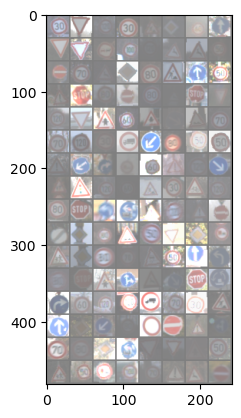

In [25]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(generator_train)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

Let's look at each image in the batch with its label:

Define the neural network:

In [ ]:
class Net(nn.Module):
    def __init__(self, img_size=28):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d (3 , 64 , kernel_size =(5 , 5) , stride =(1 , 1) )
        self.pool1 = nn.MaxPool2d ( kernel_size =2 , stride =2 , padding =0 , dilation=1 , ceil_mode = False )
        self.conv2 = nn.Conv2d (64 , 64 , kernel_size =(5 , 5) , stride =(1 , 1) )
        self.pool2 = nn.MaxPool2d ( kernel_size =2 , stride =2 , padding =0 , dilation=1 , ceil_mode = False )
        self.fc2   = nn.Linear ( in_features =1024 , out_features =43 , bias = True )

    def forward(self, x):
        x = self.conv1(F.relu(self.conv1))  # Aplly convulution using the relu function
        x = self.conv2(F.relu(self.conv2)) 
        x = x.view(x.size(0), -1) #Change the shape of x, while keeping the data
        x = self.fc2(x)
        return x



Instantiate the neural network and potentially move it to GPU:

In [27]:
net = Net()
if(gpu):
  net.to(device)
print(net)

Net(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc2): Linear(in_features=1024, out_features=43, bias=True)
)
